# Tema 1 - Fundamentos de Redes Neuronales Profundas

En este capítulo, vamos a ver los fundamentos de las redes neuronales profundas. Vamos a ver cómo se construyen las redes neuronales, cómo se entrena y cómo se evalúa. También vamos a ver cómo se puede utilizar Keras para construir redes neuronales.

## Usando Keras para clasificar dígitos escritos a mano

En esta sección, vamos a ver cómo clasificar dígitos escritos a mano utilizando Keras. Para ello, vamos a utilizar el dataset MNIST, que contiene 70.000 imágenes de dígitos escritos a mano, junto con sus etiquetas correspondientes. Este dataset es muy utilizado para probar algoritmos de clasificación, y es un buen punto de partida para aprender a utilizar Keras.

Una ventaja es que podemos utilizar Keras para cargar el dataset MNIST directamente desde Keras.

In [1]:
from keras.datasets import mnist

También tendremos que importar las librerías que vamos a utilizar:

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Además, Keras ya lo divide en un conjunto de entrenamiento y otro de test, y los devuelve como dos conjuntos de NumPy arrays, usando la función `load_data()`:

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Tenemos que modificar la forma de los arrays para que sean compatibles con Keras. Cada imagen se trata de una matriz de 28x28, y Keras espera que cada imagen sea un vector de 784 elementos.

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Las etiquetas indican qué dígito representa cada imagen, y están codificadas como números del 0 al 9. Para poder utilizarlas en Keras, tenemos que convertirlas a un formato llamado *one-hot encoding*, que consiste en convertir cada etiqueta en un vector de 10 elementos, donde todos los elementos son 0, excepto el elemento que corresponde a la etiqueta, que es 1. Por ejemplo, la etiqueta 5 se codifica como el vector `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`.

De esta forma nuestra red tendrá una capa de entrada con 784 neuronas (una por cada píxel de la imagen), y una capa de salida con 10 neuronas (una por cada clase posible).

In [5]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

Antes de llamar a nuestra función principal, tenemos que asignar el tamaño de la capa de entrada, el número de neuronas de cada capa oculta, el número de épocas de entrenamiento y el tamaño del lote:

In [6]:
input_size = 784
batch_size = 100
hidden_neurons = 100
epochs = 100

Ya estamos preparados para definir el modelo, en este caso utilizando la API secuencial de Keras. Primero creamos un objeto `Sequential`, que es el tipo de modelo que vamos a utilizar, donde cada capa sirve como entrada a la siguiente.

En Keras, `Dense` significa que es una capa totalmente conectada, es decir, cada neurona de la capa está conectada a todas las neuronas de la capa anterior y de la siguiente. La primera capa oculta tiene 300 neuronas, y la segunda capa oculta tiene 100 neuronas. La capa de salida tiene 10 neuronas, una por cada clase posible.

Utilizaremos una red neuronal con una capa oculta, activación sigmoide, y una capa de salida con activación softmax.

In [7]:
model = Sequential([
 Dense(hidden_neurons, input_dim=input_size),
 Activation('sigmoid'),
 Dense(classes),
 Activation('softmax')
])

Keras provee una manera sencilla de asignar la función de coste (la pérdida) y su optimización, en este caso la función de coste es la entropía cruzada, y el optimizador es el descenso de gradiente estocástico (SGD). Usaremos los valores por defecto para el ratio de aprendizaje y el momentum.

In [8]:
model.compile(loss='categorical_crossentropy',
metrics=['accuracy'], optimizer='sgd')

Estamos preparados para entrenar el modelo. Para ello, llamamos al método `fit()` del modelo, pasándole el conjunto de entrenamiento, el número de épocas de entrenamiento, el tamaño del lote y el conjunto de validación. Keras se encargará de entrenar el modelo, y de evaluarlo en el conjunto de validación en cada época de entrenamiento.

In [10]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
600/600 [==============================] - 1s 1ms/step - loss: 0.9375 - accuracy: 0.7659
Epoch 2/100
600/600 [==============================] - 1s 1ms/step - loss: 0.4905 - accuracy: 0.8802
Epoch 3/100
600/600 [==============================] - 1s 1ms/step - loss: 0.3928 - accuracy: 0.9003
Epoch 4/100
600/600 [==============================] - 1s 1ms/step - loss: 0.3464 - accuracy: 0.9106
Epoch 5/100
600/600 [==============================] - 1s 1ms/step - loss: 0.3147 - accuracy: 0.9176
Epoch 6/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2904 - accuracy: 0.9222
Epoch 7/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2750 - accuracy: 0.9261
Epoch 8/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2598 - accuracy: 0.9294
Epoch 9/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2507 - accuracy: 0.9315
Epoch 10/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2382 - accura

Ahora podemos evaluar la precisión del modelo en el conjunto de test:

In [11]:
score = model.evaluate(X_test, Y_test, verbose=1) 
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 603us/step - loss: 0.1204 - accuracy: 0.9644
Test accuracy: 0.9643999934196472


Y eso es todo, la precisión no es muy alta, sobre 96.4%, pero se puede mejorar utilizando mayor número de capas ocultas, más neuronas por capa, o más épocas de entrenamiento.

Para ver lo que la red ha aprendido, podemos ver los pesos de la capa oculta:

In [12]:
weights = model.layers[0].get_weights()

Para hacer esto, volveremos a convertir los pesos a una matriz de 28x28, y la mostraremos utilizando la función `imshow()` de Matplotlib:

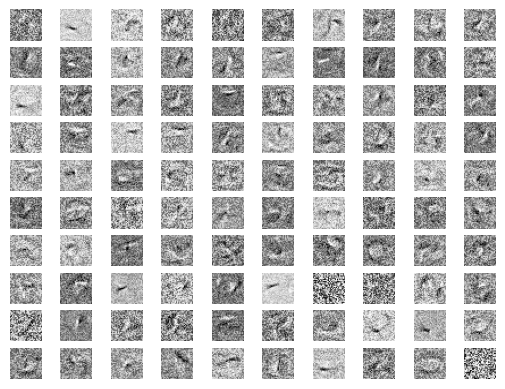

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

fig = plt.figure()
w = weights[0].T
for neuron in range(hidden_neurons):
 ax = fig.add_subplot(10, 10, neuron + 1)
 ax.axis("off")
 ax.imshow(numpy.reshape(w[neuron], (28, 28)), cmap=cm.Greys_r)
plt.savefig("neuron_images.png", dpi=300)
plt.show()

Se puede observar que cada neurona de la capa oculta se activa cuando detecta un patrón particular, como por ejemplo una línea vertical, una línea diagonal, etc. 

## Usando Keras para clasificar imágenes de objetos

En esta sección, vamos a ver cómo clasificar imágenes de objetos utilizando Keras. Para ello, vamos a utilizar el dataset CIFAR-10 (Canadian Institute For Advanced Research, https://www.cs.toronto.edu/~kriz/cifar.html), que contiene 60.000 imágenes RGB de 32x32 píxeles, divididas en 10 clases, junto con sus etiquetas correspondientes; que son: aviones, automóviles, pájaros, gatos, venados, perros, ranas, caballos, barcos y camiones.

Importaremos cifar10 de la misma forma que hicimos con MNIST:

In [14]:
from keras.datasets import cifar10
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

A continuación dividiremos los datos en 50.000 imágenes de entrenamiento y 10.000 imágenes de test.

Además, también tendremos que modificar la forma de los arrays para que sean compatibles con Keras. Cada imagen 3 canales (rojo, verde y azul) de imágenes de 32x32 píxeles, por lo que se trata de una matriz de 32x32x3, y por tanto Keras espera que cada imagen sea un vector de 3072 elementos.

In [15]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

input_size = 3072
batch_size = 100
epochs = 100

170498071/170498071 [==============================] - 7s 0us/step


Este dataset es más complejo que MNIST, por lo que vamos a utilizar una red neuronal más compleja. Por lo que vamos a utilizar 3 capas ocultas y más neuronas por capa.

In [16]:
model = Sequential([
 Dense(1024, input_dim=input_size),
 Activation('relu'),
 Dense(512),
 Activation('relu'),
 Dense(512),
 Activation('sigmoid'),
 Dense(classes),
 Activation('softmax')
])

Realizaremos el entrenamiento con un parámetro adicional `validation_data=(X_test, Y_test)` que utilizará el conjunto de test para evaluar el modelo en cada época de entrenamiento.

In [17]:
model.compile(loss='categorical_crossentropy',
metrics=['accuracy'], optimizer='sgd')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
500/500 [==============================] - 5s 10ms/step - loss: 2.1909 - accuracy: 0.1760 - val_loss: 2.0691 - val_accuracy: 0.2315
Epoch 2/100
500/500 [==============================] - 5s 10ms/step - loss: 2.0467 - accuracy: 0.2382 - val_loss: 2.0191 - val_accuracy: 0.2362
Epoch 3/100
500/500 [==============================] - 10s 19ms/step - loss: 1.9725 - accuracy: 0.2750 - val_loss: 1.9459 - val_accuracy: 0.2901
Epoch 4/100
500/500 [==============================] - 6s 11ms/step - loss: 1.9260 - accuracy: 0.2982 - val_loss: 1.9021 - val_accuracy: 0.3022
Epoch 5/100
500/500 [==============================] - 5s 10ms/step - loss: 1.8894 - accuracy: 0.3153 - val_loss: 1.8950 - val_accuracy: 0.3151
Epoch 6/100
500/500 [==============================] - 5s 10ms/step - loss: 1.8580 - accuracy: 0.3274 - val_loss: 1.8276 - val_accuracy: 0.3442
Epoch 7/100
500/500 [==============================] - 5s 10ms/step - loss: 1.8315 - accuracy: 0.3367 - val_loss: 1.8412 - val_accuracy

Vamos a visualizar los pesos de 100 neuronas aleatorias de la primera capa oculta.

Para ello, vamos a reconvertir los pesos a una matriz de 32x32 y vamos a computar la media de los pesos de cada canal de color para producir una imagen en escala de grises.

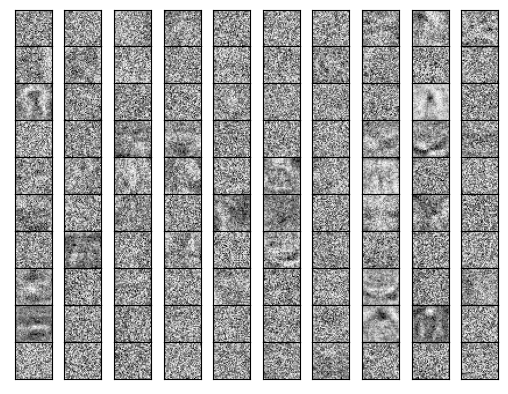

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy
import random

fig = plt.figure()
outer_grid = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)
weights = model.layers[0].get_weights()

w = weights[0].T

for i, neuron in enumerate(random.sample(range(0, 1023), 100)):
    ax = plt.Subplot(fig, outer_grid[i])
    ax.imshow(numpy.mean(numpy.reshape(w[i], (32, 32, 3)), axis=2), cmap=cm.Greys_r)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
 
plt.savefig("neuron_images_2.png", dpi=300)
plt.show()

In [19]:
score = model.evaluate(X_test, Y_test, verbose=1) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.4086 - accuracy: 0.5230
Test accuracy: 0.5230000019073486


Comparado con el dataset de MNIST, este dataset es mucho más complejo, por lo que la precisión es mucho menor, sobre 52%. Además, el modelo se ha sobreajustado, ya que la precisión en el conjunto de entrenamiento es mucho mayor que la precisión en el conjunto de test.

Para mejorar estos resultados, deberíamos utilizar una red neuronal convolucional.